In [56]:
%autoreload 2
%matplotlib inline
import sh_vasp as vasp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

textsize = 22
mpl.rcParams['xtick.labelsize'] = textsize
mpl.rcParams['ytick.labelsize'] = textsize
mpl.rcParams['figure.figsize'] = (10, 16)

## Layer plotting DOS code

* To use this, you need to have, `OUTCAR`, `CONTCAR` and `DOSCAR` in the directory.
* You also need to have the file `sh_vasp.py` either in the directory *or* in your `PYTHONPATH`.
* Once you have those things set up then you just need to play with this script.
* The parameters you need to set are direction and number of bins - I think the meaning of these is quite clear.

In [66]:
direction = 'z'
number_of_bins = 16

positions, lattice, numbers = vasp.get_atom_coordinates('CONTCAR')
atomic_dos = vasp.atomic_DOS(numbers,number_of_bins,direction,positions,lattice)
layer = vasp.layer_DOS(numbers, number_of_bins, atomic_dos)

## Plotting

You will need to adjust some parameters below to your system. The most critical one is that you need to adjust for the number of atomic species in your calculaion. The code plots once for each sepcies.  The block of code for each species looks like:

        for j in (layer[0][i]):
            ene_a.append(j[0])
            dos_a.append(sum(j[1:]))
        ax1[i].plot(ene_a[110:200], dos_a[110:200],lw=2)
        ax1[i].fill_between(ene_a,0,dos_a,alpha=0.4)
        
 Simply replicate this as many times as you need, changing the index of layer[$] in the for loop.
 
 You can also play with the limits of how much of your range to plot (here I go from 110:200) and change your axis limits.
 

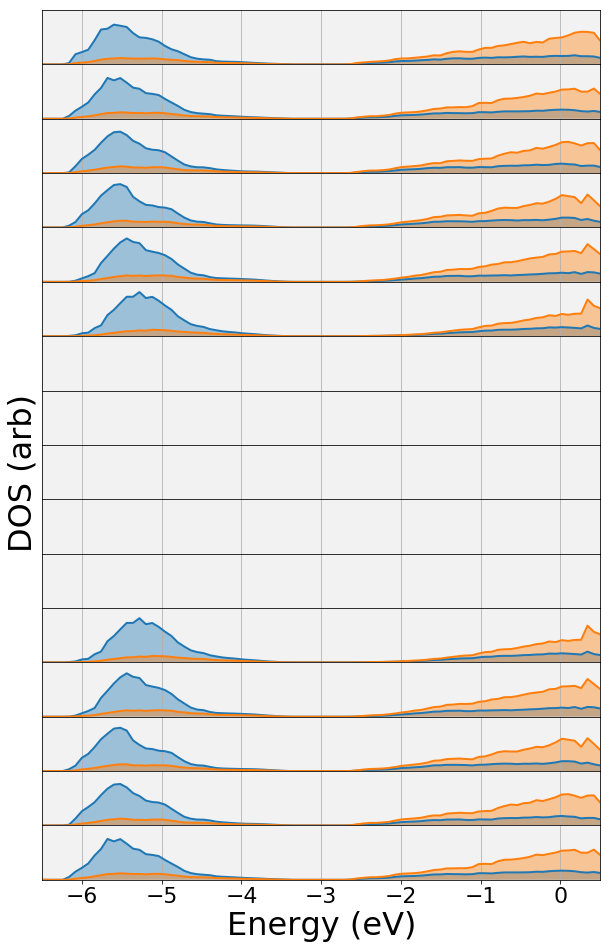

In [68]:
fig, ax1 = plt.subplots(number_of_bins, 1, sharex=True)
for i in range(number_of_bins):
    dos_a = []
    ene_a = []
    dos_b = []
    ene_b = []
    

    for j in (layer[0][i]):
        ene_a.append(j[0])
        dos_a.append(sum(j[1:]))
    ax1[i].plot(ene_a[110:200], dos_a[110:200],lw=2)
    ax1[i].fill_between(ene_a,0,dos_a,alpha=0.4)

    for j in (layer[1][i]):
        ene_b.append(j[0])
        dos_b.append(sum(j[1:]))
    ax1[i].plot(ene_b[110:200], dos_b[110:200],lw=2)
    ax1[i].fill_between(ene_b,0,dos_b,alpha=0.4)
    
    ax1[i].set_yticks([])
    ax1[i].set_ylim(0,3)
    ax1[i].set_xlim(-6.5,0.5)
    ax1[i].set_facecolor((0.95,0.95,0.95))
    ax1[i].set_yticklabels([])
    ax1[i].grid(True)
    
ax1[8].set_ylabel('DOS (arb)',fontsize=32)
ax1[15].set_xlabel('Energy (eV)',fontsize=32)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

![alt text](slab.png "Title")